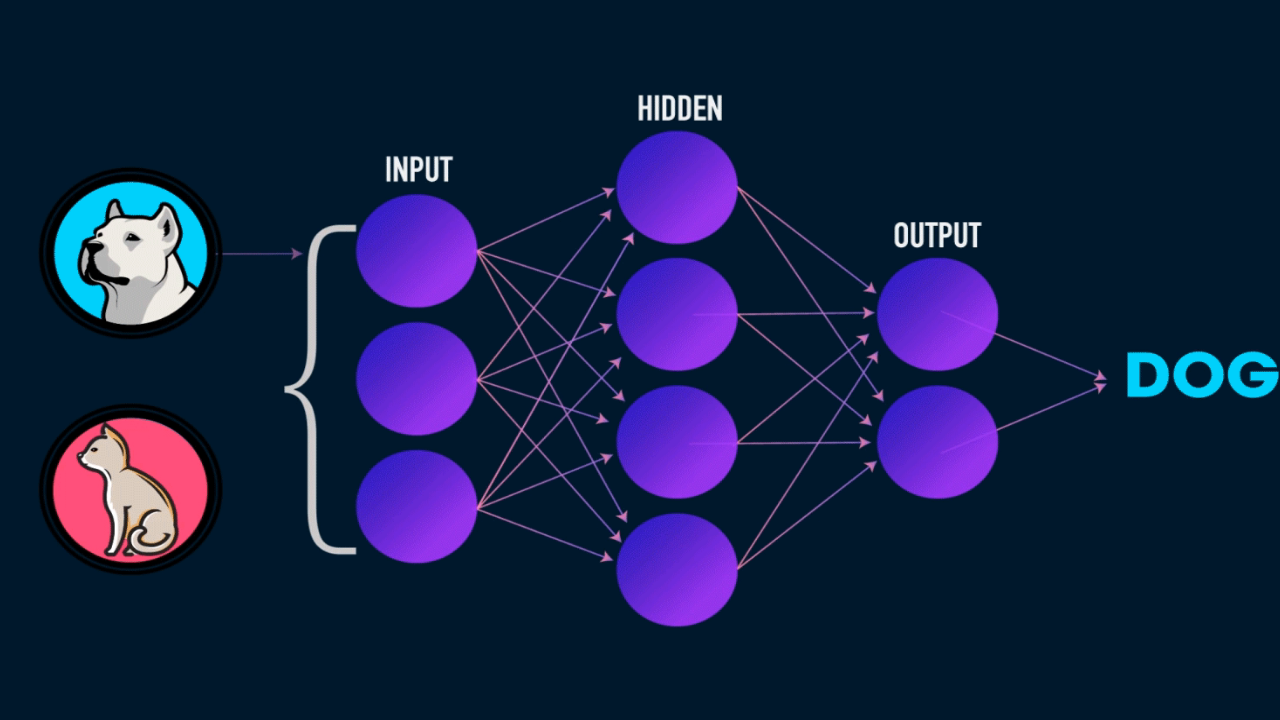

In [22]:
pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=585c0897c9df8ef19591abe413b61a87d83949eaa67c3f6d1db29c904936f248
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\8b\f1\7f\5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [14]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense ,Conv2D, MaxPooling2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [15]:
import wget

In [28]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [25]:
pip install zipfile38

Note: you may need to restart the kernel to use updated packages.


In [31]:
import os
import zipfile

local_zip = 'temp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip,'r')

zip_ref.extractall('/temp')
zip_ref.close()

In [67]:
base_dir = 'temp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#repertoires avec nos photos(d'entrainement) de chiens et de chats
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#repertoires avec nos photos(de validation) de chiens et de chats
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [16]:
validation_dir ="temp/cats_and_dogs_filtered/validation"
train_dir="temp/cats_and_dogs_filtered/train"
train_cats_dir="temp/cats_and_dogs_filtered/train/cats"
train_dogs_dir="temp/cats_and_dogs_filtered/train/dogs"
validation_cats_dir = "temp/cats_and_dogs_filtered/validation/cats"
validation_dogs_dir = "temp/cats_and_dogs_filtered/validation/dogs"

In [17]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:11])
print(train_dog_fnames[:12])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg', 'dog.107.jpg', 'dog.108.jpg']


In [18]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


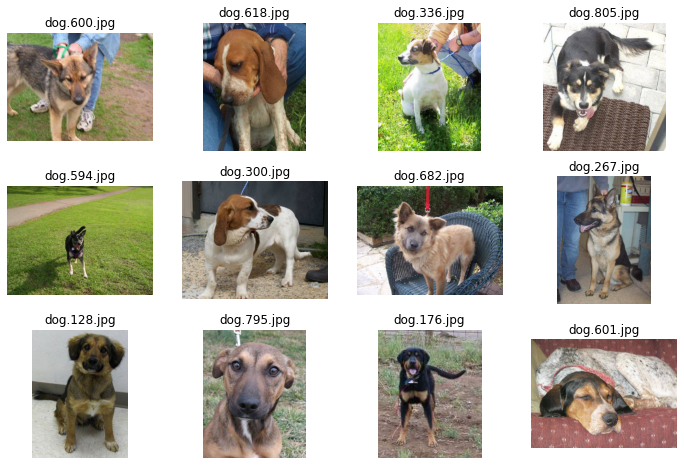

In [19]:
samples_dogs = np.random.choice(os.listdir(train_dogs_dir),size = 12)

plt.figure(figsize = (12,8))
for i,dog in enumerate(samples_dogs):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_dogs_dir,dog))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(dog)

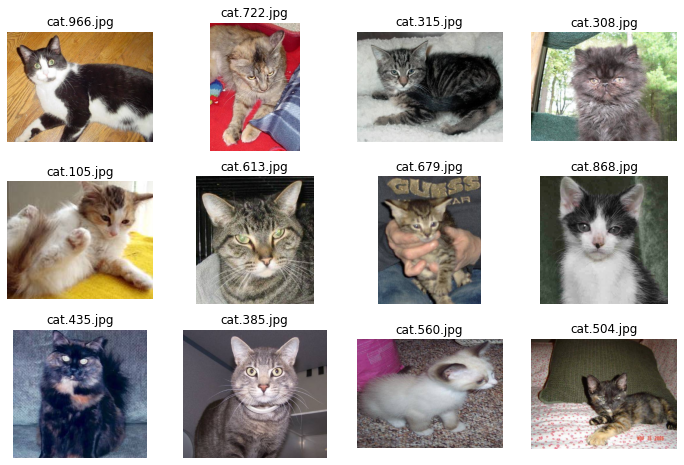

In [20]:
samples_cats = np.random.choice(os.listdir(train_cats_dir),size = 12)
plt.figure(figsize = (12,8))
for i,cat in enumerate(samples_cats):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_cats_dir,cat))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(cat)

In [70]:
train_dir="temp/cats_and_dogs_filtered/train"

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
# model et couches
model = Sequential()
model.add(Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3) ,activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3) ,activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [ ]:
# model = models.Sequential([
#     tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512,activation = 'relu'),
#     tf.keras.layers.Dense(1,activation = 'sigmoid')
# ])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [26]:
opt = Adam(learning_rate = 1e-3, decay = 1e-5)
#Configuration the model for training
# model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
# model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['acc'])

In [27]:
model.compile(optimizer = opt,loss='binary_crossentropy',metrics = ['acc'])

In [80]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

UsageError: Line magic function `%tensorflow_version` not found.


In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Epoch 1/10
100/100 [==============================] - 121s 1s/step - loss: 0.7016 - acc: 0.4975 - val_loss: 0.6918 - val_acc: 0.5130
Epoch 2/10
100/100 [==============================] - 122s 1s/step - loss: 0.6958 - acc: 0.4935 - val_loss: 0.6931 - val_acc: 0.5130
Epoch 3/10
100/100 [==============================] - 125s 1s/step - loss: 0.6942 - acc: 0.4935 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 123s 1s/step - loss: 0.6949 - acc: 0.4900 - val_loss: 0.6911 - val_acc: 0.5570
Epoch 5/10
100/100 [==============================] - 123s 1s/step - loss: 0.6918 - acc: 0.5140 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 122s 1s/step - loss: 0.6938 - acc: 0.4945 - val_loss: 0.6928 - val_acc: 0.5010
Epoch 7/10
100/100 [==============================] - 122s 1s/step - loss: 0.6893 - acc: 0.5270 - val_loss: 0.6898 - val_acc: 0.5330
Epoch 8/10
100/100 [==============================] - 126s 1s/step - 

In [56]:
model.save("model_cats_dags2.h5")

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

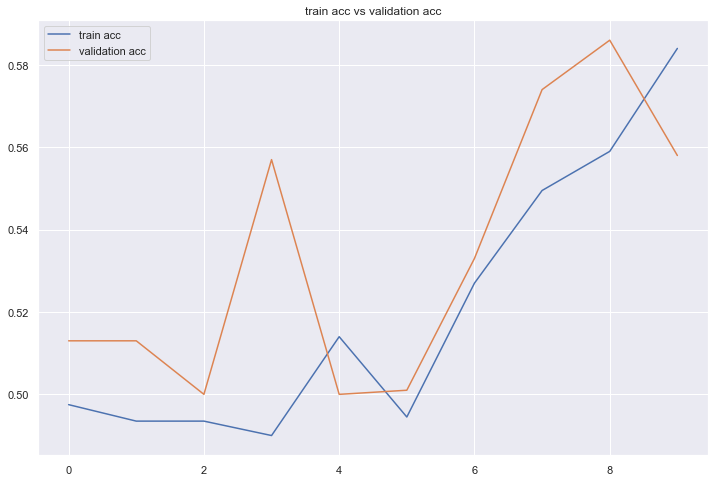

In [31]:
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

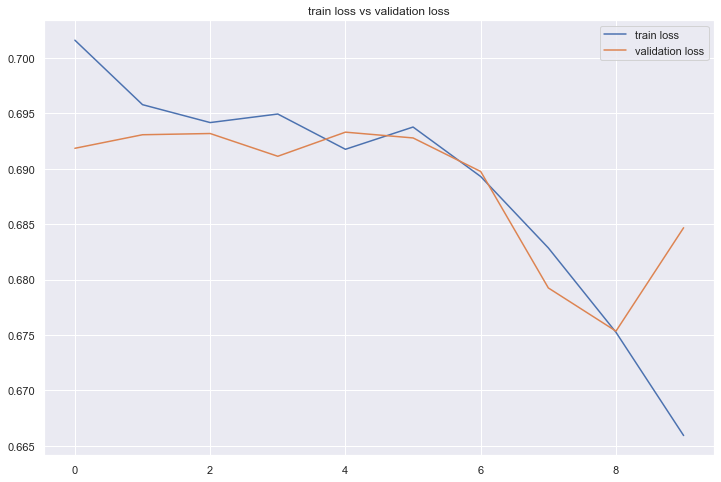

In [32]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# image augmentation

In [33]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [34]:
from tensorflow.keras.preprocessing import image

sample_cat = np.random.choice(os.listdir(train_cats_dir))
img = image.load_img(os.path.join(train_cats_dir,sample_cat),target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

datagen_img = datagen.flow(x,batch_size = 1)

In [35]:
x.shape

(1, 150, 150, 3)

(-0.5, 149.5, 149.5, -0.5)

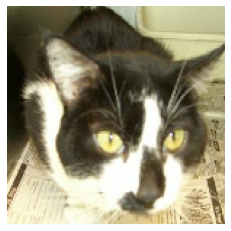

In [36]:
plt.imshow(img)
plt.axis("off")

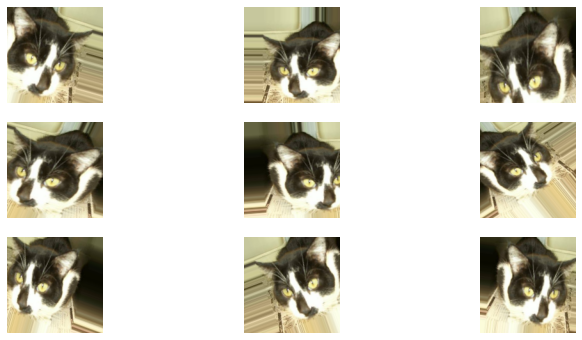

In [37]:
plt.figure(figsize = (12,6))
for i,batch in enumerate(datagen.flow(x,batch_size = 1)):
    
    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.squeeze(batch).astype("int64"))
    plt.axis("off")
    
    if i == 8:
        break
plt.show()

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1/255.0,      
    rotation_range=40, #va faire une rotation de l'image en choissisant un nb aleatoire entre 0 et 40
    width_shift_range=0.2, #va deplacer l'objet de 20% de sa largeur(il peut etre negatif)
    height_shift_range=0.2,
    shear_range=0.2,#va cisailler l'image de 20% 
    zoom_range=0.2, # pour zoomer dans l'image de 0 a 0.2
    horizontal_flip=True, #va faire une symetrie de l'image suivant la droite qui passe par le centre de l'image
    fill_mode='nearest' #pour specifier comment arranger l'image vu qu'elle va perdre les px apeès nos operations
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics = ['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


NameError: name 'tf' is not defined

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

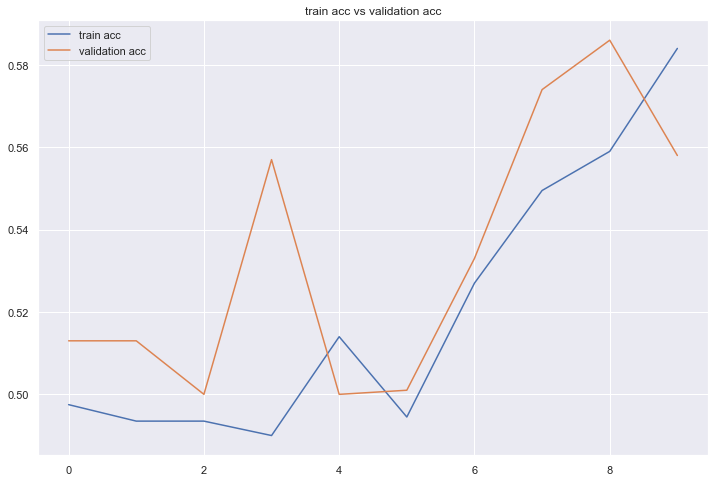

In [40]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

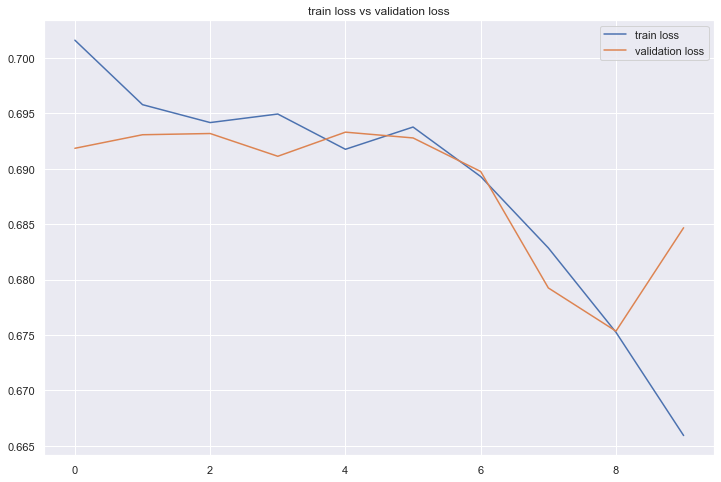

In [41]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# Prediction

In [58]:
from keras.preprocessing import image
from keras.models import load_model
model = load_model("model_cats_dags.h5")
model2 = load_model("model_cats_dags2.h5")
import numpy as np

In [43]:
test\dogs\dog.4014.jpg
test\cats\cat.4003.jpg

SyntaxError: unexpected character after line continuation character (3583882087.py, line 1)

In [59]:
from tensorflow.keras.preprocessing import image
img = image.load_img('test\dogs\dog.4014.jpg',target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

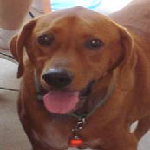

In [54]:

img

In [60]:
x.shape

(1, 150, 150, 3)

In [61]:
model.predict(x)

array([[1.]], dtype=float32)

In [62]:
model2.predict(x)

array([[0.9770754]], dtype=float32)

In [48]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
pip install tensorflow==1.14

In [5]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [8]:
# from tensorflow.contrib import lite
# converter = lite.TFLiteConverter.from_keras_model_file('model_cats_dags.h5')
# tfmodel=converter.convert()
# open("model.tflite","wb").write(tfmodel)
import tensorflow as tf
model=tf.keras.models.load_model("model_cats_dags.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model) 

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpyody317t\assets


13816692